In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from collections import Counter
import re

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 150

print("✅ Libraries imported")

✅ Libraries imported


In [ ]:
# Load cleaned data from Notebook 1
df = pd.read_csv('data/amazon_electronics_cleaned.csv')

print(f"✅ Loaded {len(df):,} reviews")
print(f"   Columns: {list(df.columns)}")
df.head()

✅ Loaded 49,953 reviews
   Columns: ['text', 'rating']


,text,rating
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1


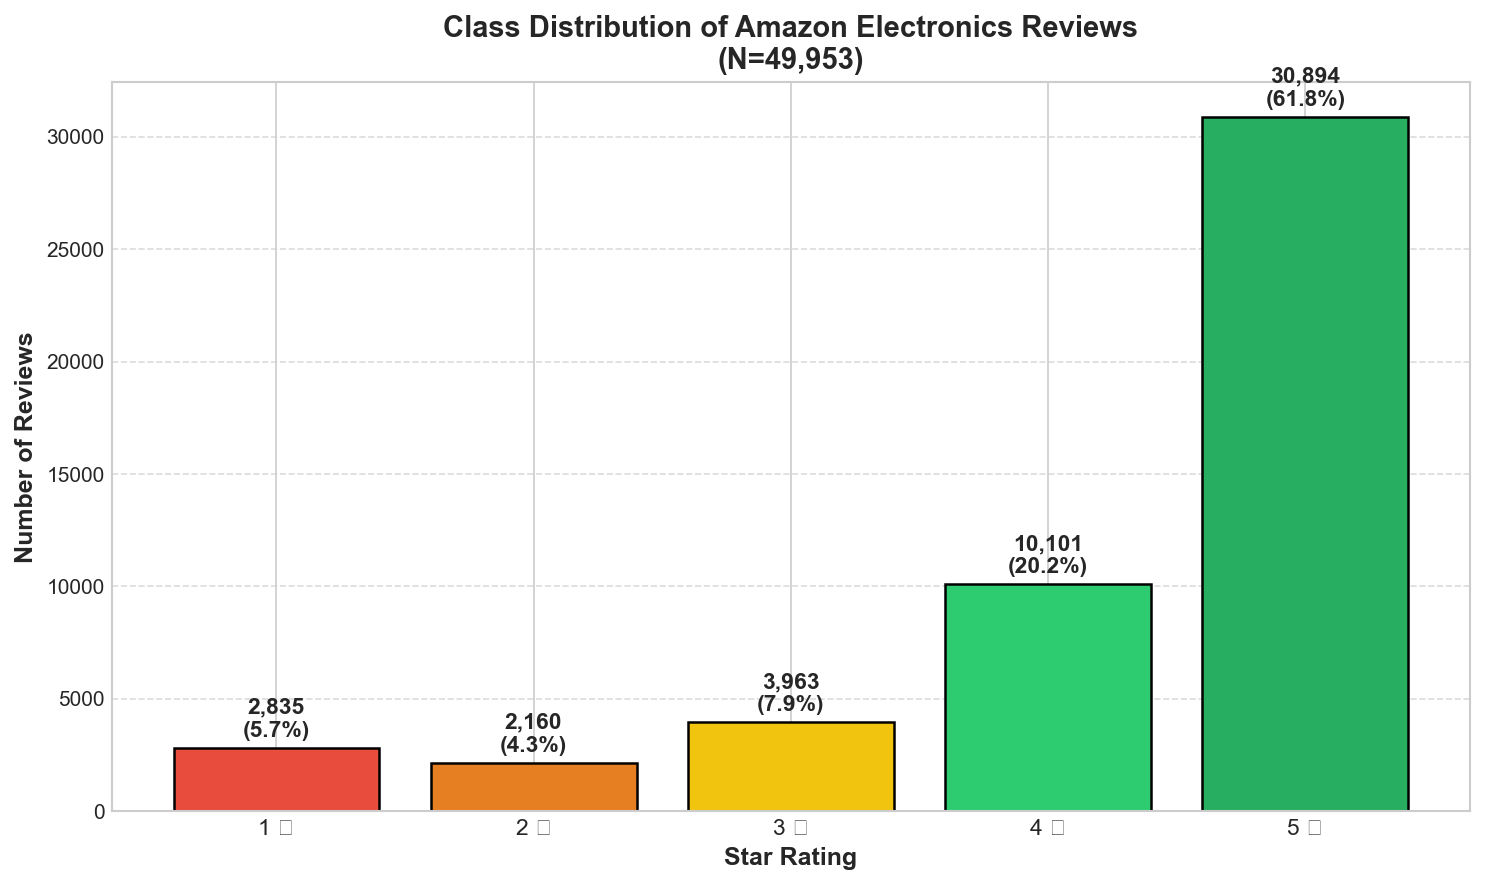


✅ Saved: class_distribution.png


In [ ]:
# ============================================================================
# CLASS DISTRIBUTION PLOT (For Report)
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

rating_counts = df['rating'].value_counts().sort_index()
colors = ['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71', '#27ae60']

bars = ax.bar(rating_counts.index, rating_counts.values, color=colors, 
              edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar, count in zip(bars, rating_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(rating_counts)*0.01, 
            f'{count:,}\n({count/len(df)*100:.1f}%)', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax.set_title(f'Class Distribution of Amazon Electronics Reviews\n(N={len(df):,})', 
             fontsize=14, fontweight='bold')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['1 ⭐', '2 ⭐', '3 ⭐', '4 ⭐', '5 ⭐'], fontsize=11)

# Add grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('results/figures/class_distribution.png', dpi=150, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

print("\n✅ Saved: results/figures/class_distribution.png")

In [8]:
# Calculate text statistics
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("📏 Review Length Statistics:")
print(df[['text_length', 'word_count']].describe())

📏 Review Length Statistics:
        text_length    word_count
count  49953.000000  49953.000000
mean     577.542510    105.345104
std      698.838913    124.748188
min       10.000000      2.000000
25%      173.000000     32.000000
50%      337.000000     63.000000
75%      698.000000    128.000000
max    15567.000000   2845.000000


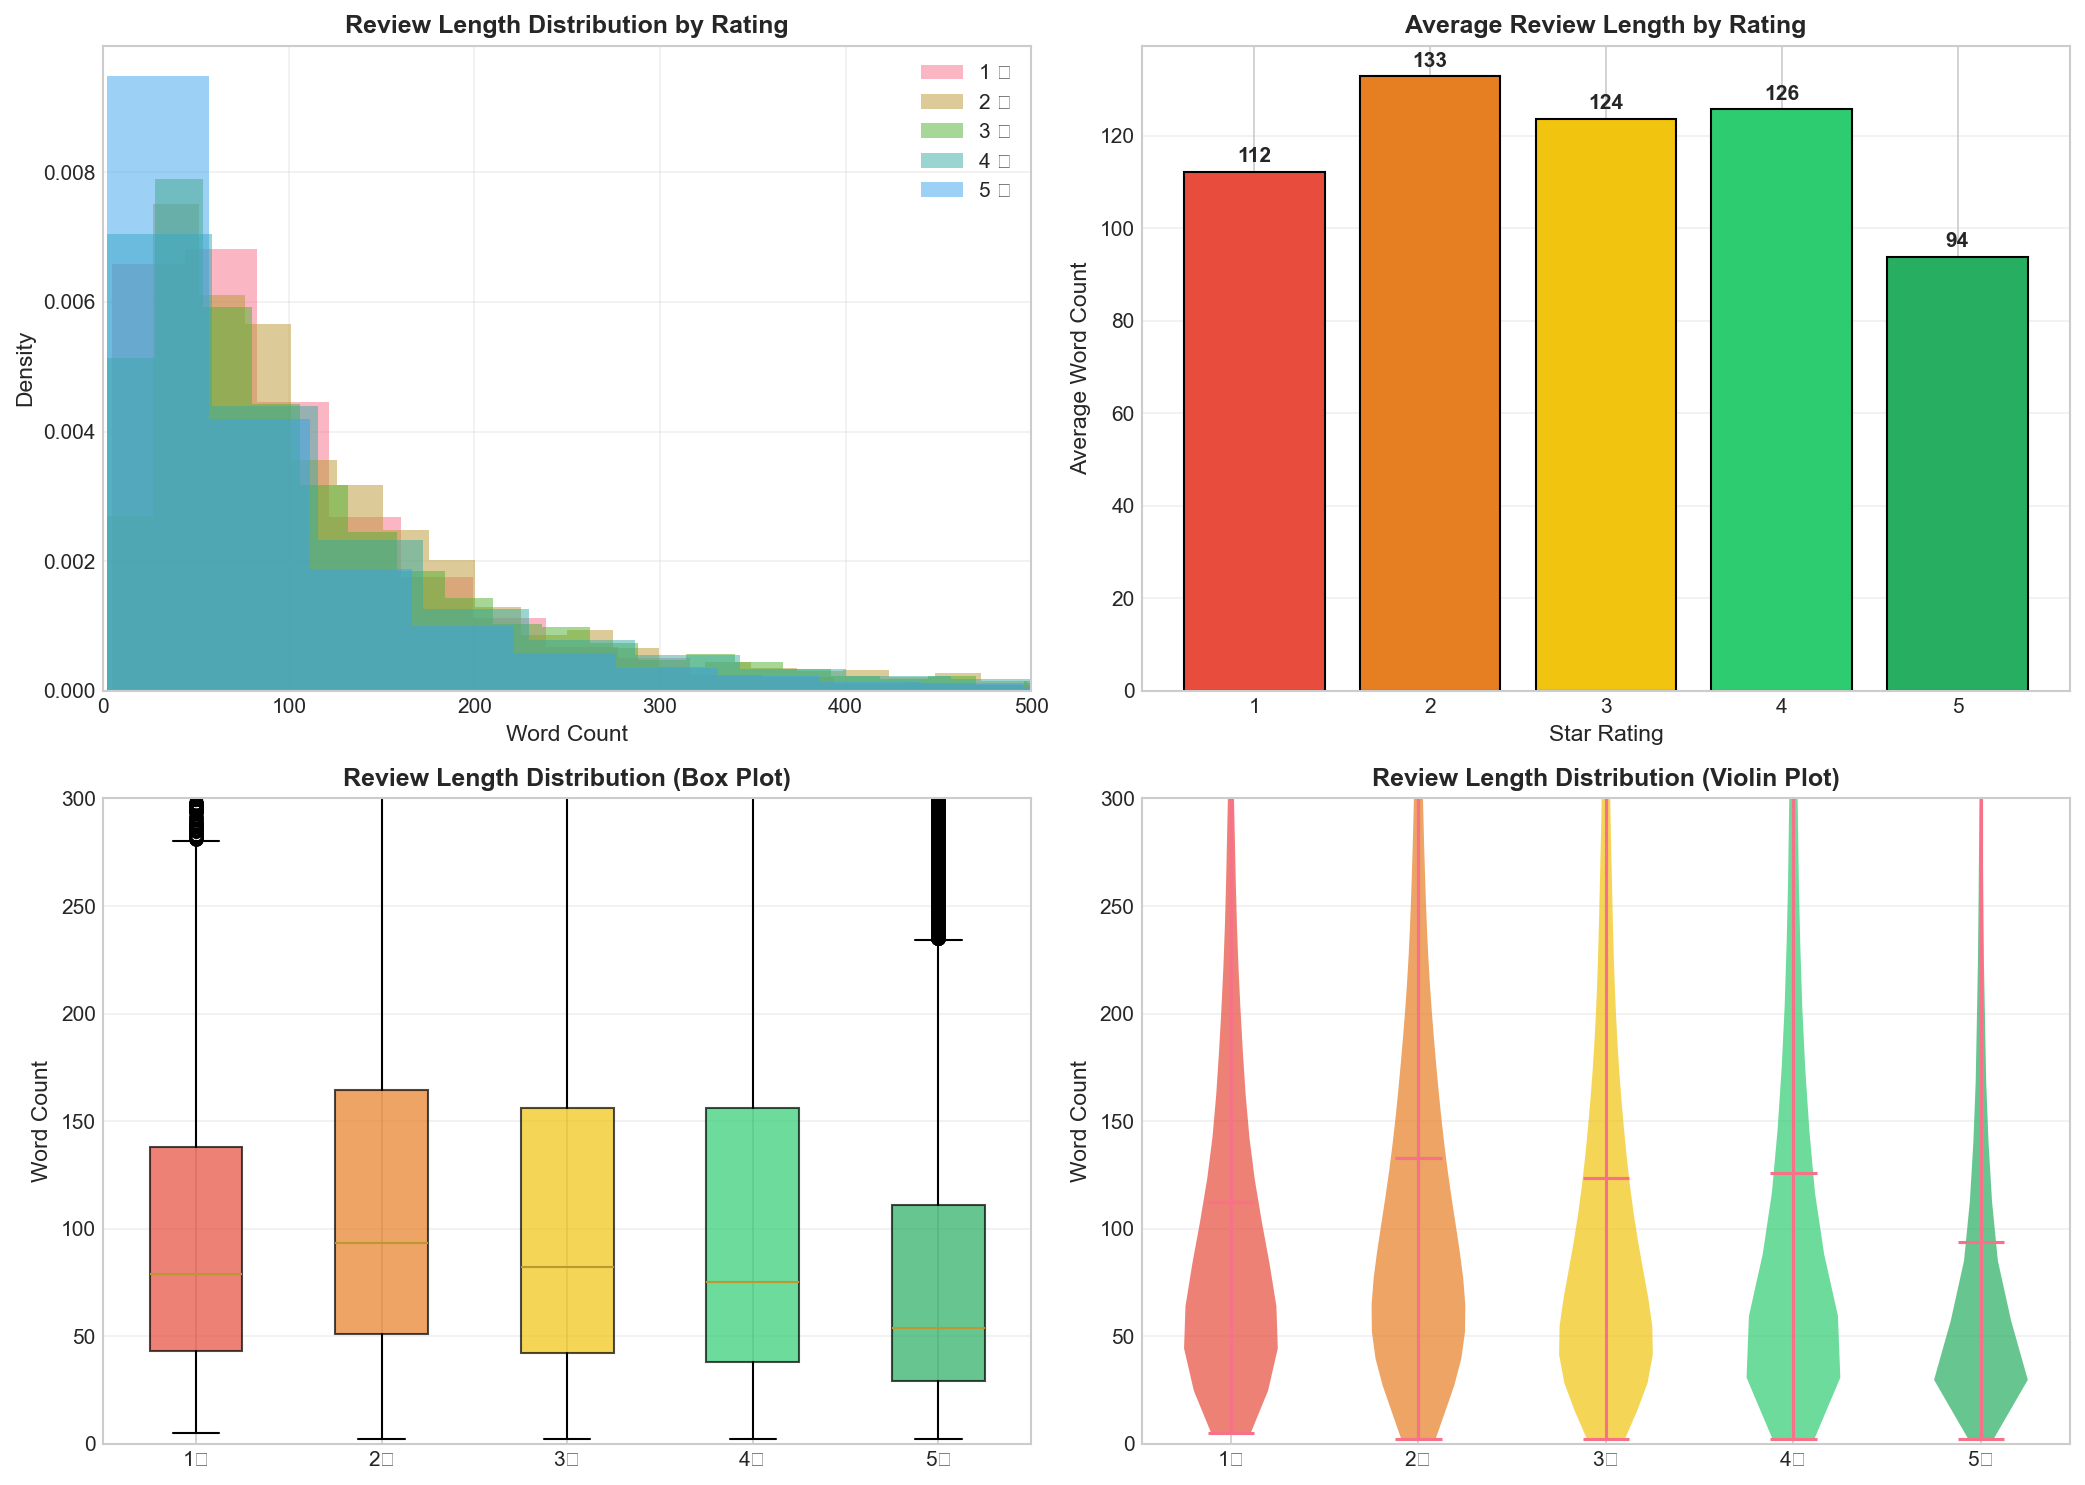


✅ Saved: review_length_analysis.png


In [ ]:
# ============================================================================
# REVIEW LENGTH BY RATING (Enhanced)
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Word count distribution (histogram)
for rating in [1, 2, 3, 4, 5]:
    subset = df[df['rating'] == rating]['word_count']
    axes[0, 0].hist(subset, bins=50, alpha=0.5, label=f'{rating} ⭐', density=True)

axes[0, 0].set_xlabel('Word Count', fontsize=11)
axes[0, 0].set_ylabel('Density', fontsize=11)
axes[0, 0].set_title('Review Length Distribution by Rating', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xlim([0, 500])
axes[0, 0].grid(True, alpha=0.3)

# 2. Average word count by rating
avg_words = df.groupby('rating')['word_count'].mean()
bars = axes[0, 1].bar(avg_words.index, avg_words.values, color=colors, edgecolor='black')
axes[0, 1].set_xlabel('Star Rating', fontsize=11)
axes[0, 1].set_ylabel('Average Word Count', fontsize=11)
axes[0, 1].set_title('Average Review Length by Rating', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks([1, 2, 3, 4, 5])
axes[0, 1].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, avg_words.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, val + 2, f'{val:.0f}', 
                 ha='center', fontsize=10, fontweight='bold')

# 3. Box plot for review length
box_data = [df[df['rating'] == r]['word_count'].values for r in [1, 2, 3, 4, 5]]
bp = axes[1, 0].boxplot(box_data, labels=['1⭐', '2⭐', '3⭐', '4⭐', '5⭐'], 
                        patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_ylabel('Word Count', fontsize=11)
axes[1, 0].set_title('Review Length Distribution (Box Plot)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_ylim([0, 300])

# 4. Violin plot
parts = axes[1, 1].violinplot(box_data, positions=[1, 2, 3, 4, 5], showmeans=True)
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
axes[1, 1].set_xticks([1, 2, 3, 4, 5])
axes[1, 1].set_xticklabels(['1⭐', '2⭐', '3⭐', '4⭐', '5⭐'])
axes[1, 1].set_ylabel('Word Count', fontsize=11)
axes[1, 1].set_title('Review Length Distribution (Violin Plot)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim([0, 300])

plt.tight_layout()
plt.savefig('results/figures/review_length_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Saved: results/figures/review_length_analysis.png")

In [10]:
# Show sample reviews for each rating
print("=" * 70)
print("SAMPLE REVIEWS BY RATING")
print("=" * 70)

for rating in [1, 2, 3, 4, 5]:
    sample = df[df['rating'] == rating]['text'].iloc[0][:200]
    print(f"\n{'⭐' * rating} ({rating}-star):")
    print(f"   {sample}...")

SAMPLE REVIEWS BY RATING

⭐ (1-star):
   I'm a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.  Rand McNally, are you listening?First thing I did after charging it was connect it to my lap...

⭐⭐ (2-star):
   Not going to write a long review, even thought this unit deserves one. I've driven well over 1-mil miles and done most of my own routing so I pretty know whats the fastest and shortest. Have been usin...

⭐⭐⭐ (3-star):
   Well, what can I say.  I've had this unit in my truck for about four days now.  Prior to that I had a Garmin 755T non-truck GPS.  One of my favorite features in that unit was the ability to plan a rou...

⭐⭐⭐⭐ (4-star):
   This adapter easily connects my Nook HD 7&#34; to my HDTV through the HDMI cable.  This is good for traveling because it makes any hotel TV a potential smart TV so long as there is an accessible HDMI ...

⭐⭐⭐⭐⭐ (5-star):
   We got this GPS for my husband who is an (OTR) over the road trucker.

In [11]:
# ============================================================================
# STATISTICAL TESTS
# ============================================================================

print("=" * 70)
print("📊 STATISTICAL ANALYSIS")
print("=" * 70)

# Chi-square test for uniform distribution
observed = df['rating'].value_counts().sort_index().values
expected = np.full(len(observed), len(df) / len(observed))
chi2_stat, p_value = stats.chisquare(observed, expected)

print(f"\n1. CHI-SQUARE TEST (Uniform Distribution):")
print(f"   H0: Ratings are uniformly distributed")
print(f"   Chi² statistic: {chi2_stat:.2f}")
print(f"   p-value: {p_value:.2e}")
print(f"   Result: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'} - Distribution is {'NOT uniform' if p_value < 0.05 else 'uniform'}")

# Kruskal-Wallis test for review length differences
groups = [df[df['rating'] == r]['word_count'].values for r in [1, 2, 3, 4, 5]]
h_stat, p_kw = stats.kruskal(*groups)

print(f"\n2. KRUSKAL-WALLIS TEST (Review Length by Rating):")
print(f"   H0: No difference in review length across ratings")
print(f"   H statistic: {h_stat:.2f}")
print(f"   p-value: {p_kw:.2e}")
print(f"   Result: {'Significant difference' if p_kw < 0.05 else 'No significant difference'} in review lengths")

# ============================================================================
# WORD FREQUENCY ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("📝 WORD FREQUENCY ANALYSIS")
print("=" * 70)

def get_top_words(text_series, n=10):
    """Get top N words from text series."""
    all_words = []
    for text in text_series:
        words = re.findall(r'\b[a-z]+\b', text.lower())
        all_words.extend(words)
    return Counter(all_words).most_common(n)

print("\nTop 10 words by rating:")
for rating in [1, 2, 3, 4, 5]:
    top_words = get_top_words(df[df['rating'] == rating]['text'], n=10)
    words_str = ", ".join([f"{word}({count})" for word, count in top_words[:5]])
    print(f"   {rating}⭐: {words_str}")

# ============================================================================
# KEY INSIGHTS FOR REPORT
# ============================================================================

print("\n" + "=" * 70)
print("📋 KEY INSIGHTS FOR REPORT")
print("=" * 70)

rating_counts = df['rating'].value_counts().sort_index()

print(f"""
1. DATASET SIZE:
   - Total reviews: {len(df):,}
   - Source: Amazon Electronics Reviews (McAuley Lab, UCSD)

2. CLASS IMBALANCE:
   - 5-star reviews: {rating_counts[5]:,} ({rating_counts[5]/len(df)*100:.1f}%)
   - 1-star reviews: {rating_counts[1]:,} ({rating_counts[1]/len(df)*100:.1f}%)
   - Imbalance ratio: {rating_counts[5]/rating_counts.min():.1f}:1
   - Statistical test: Distribution is {'highly imbalanced' if p_value < 0.001 else 'balanced'}

3. REVIEW LENGTH:
   - Average words: {df['word_count'].mean():.0f}
   - Median words: {df['word_count'].median():.0f}
   - Negative reviews tend to be longer (more detail about complaints)
   - Statistical test: {'Significant' if p_kw < 0.05 else 'No significant'} difference across ratings

4. CHALLENGE FOR CLASSIFICATION:
   - Adjacent ratings (4★ vs 5★) use similar vocabulary
   - Class imbalance affects minority class performance
   - Ordinal structure: 1 < 2 < 3 < 4 < 5
""")

📊 STATISTICAL ANALYSIS

1. CHI-SQUARE TEST (Uniform Distribution):
   H0: Ratings are uniformly distributed
   Chi² statistic: 58636.84
   p-value: 0.00e+00
   Result: Reject H0 - Distribution is NOT uniform

2. KRUSKAL-WALLIS TEST (Review Length by Rating):
   H0: No difference in review length across ratings
   H statistic: 1487.28
   p-value: 0.00e+00
   Result: Significant difference in review lengths

📝 WORD FREQUENCY ANALYSIS

Top 10 words by rating:
   1⭐: the(16496), i(11333), to(8869), a(8079), and(7982)
   2⭐: the(16029), i(9479), to(7919), a(7402), it(7106)
   3⭐: the(27555), i(15477), to(13653), a(13030), it(11858)
   4⭐: the(70487), i(38858), a(35462), to(33853), and(32215)
   5⭐: the(144919), i(97039), and(83866), a(78220), to(75844)

📋 KEY INSIGHTS FOR REPORT

1. DATASET SIZE:
   - Total reviews: 49,953
   - Source: Amazon Electronics Reviews (McAuley Lab, UCSD)

2. CLASS IMBALANCE:
   - 5-star reviews: 30,894 (61.8%)
   - 1-star reviews: 2,835 (5.7%)
   - Imbalance rati